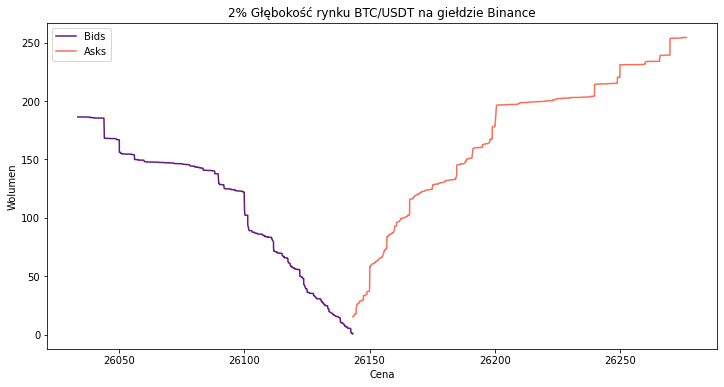

In [8]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

response = requests.get("https://api.binance.com/api/v1/depth?symbol=BTCUSDT&limit=1000")
data = response.json()

bids = pd.DataFrame(data['bids'], columns=['Price', 'Bid Volume']).astype(float)
asks = pd.DataFrame(data['asks'], columns=['Price', 'Ask Volume']).astype(float)

highest_bid = bids['Price'].max()
lowest_ask = asks['Price'].min()
two_percent_depth = (highest_bid + lowest_ask) / 2 * 0.02

filtered_bids = bids[bids['Price'] >= highest_bid - two_percent_depth]
filtered_asks = asks[asks['Price'] <= lowest_ask + two_percent_depth]

plt.figure(figsize=(12, 6))

colors = plt.cm.magma(np.linspace(0.3, 0.7, 2))

plt.plot(filtered_bids['Price'], filtered_bids['Bid Volume'].cumsum(), label='Bids', color=colors[0])
plt.plot(filtered_asks['Price'], filtered_asks['Ask Volume'].cumsum(), label='Asks', color=colors[1])
plt.title('2% Głębokość rynku BTC/USDT na giełdzie Binance')
plt.xlabel('Cena')
plt.ylabel('Wolumen')
plt.legend()
plt.show()

